In [1]:
from __future__ import print_function
import struct
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.fromstring(f.read(), dtype=np.uint8).reshape(shape)


trainImages = read_idx('train-images-idx3-ubyte')
trainLabels = read_idx('train-labels-idx1-ubyte')
testImages = read_idx('t10k-images-idx3-ubyte')
testLabels = read_idx('t10k-labels-idx1-ubyte')



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


In [2]:
#Determine the size of the files:
print(trainImages.shape)
print(trainLabels.shape)
print(testImages.shape)
print(testLabels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
#Convert 3D Array to a 2D Array via reshaping
train_data = trainImages.reshape(trainImages.shape[0],-1)
test_data = testImages.reshape(testImages.shape[0],-1)
train_label = trainLabels.reshape(trainImages.shape[0],1)
test_label = testLabels.reshape(testImages.shape[0],1)

print('trainImages size:' + str(train_data.shape))
print('trainLabels size:' + str(train_label.shape))
print('testImages size:' + str(test_data.shape))
print('testLabels size:' + str(test_label.shape))

trainImages size:(60000, 784)
trainLabels size:(60000, 1)
testImages size:(10000, 784)
testLabels size:(10000, 1)


In [4]:
k_value = range(1,11)
accuracy = []

for i in k_value:
    neigh = KNeighborsClassifier(n_neighbors=i, p=1, n_jobs=-1)
    neigh.fit(train_data,train_label)
    prediction = neigh.predict(test_data)
    score = accuracy_score(test_label,prediction)
    accuracy.append(score)
    print("K=%d, Accuracy=%.2f%%" % (i, score*100))
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=1, Accuracy=96.31%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=2, Accuracy=95.40%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=3, Accuracy=96.33%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=4, Accuracy=96.07%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=5, Accuracy=96.18%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=6, Accuracy=96.10%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=7, Accuracy=96.15%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=8, Accuracy=95.95%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=9, Accuracy=95.97%


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


K=10, Accuracy=95.89%


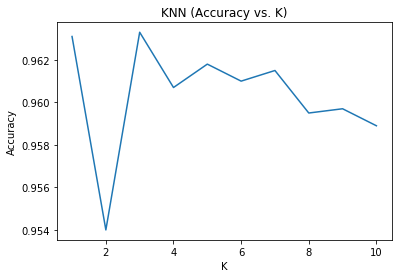

In [5]:
plt.plot(k_value, accuracy)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN (Accuracy vs. K)')
plt.show()